# Practice for Measure of Central Tendency

1. Load in the relevant dataset using csv DictReader. The path has been provided.

In [1]:
import csv
path = 'nhis.csv'

with open(path, encoding='utf-8') as f:
    reader = csv.DictReader(f)
    data = list(reader)

2. Extract values for the the variable height and save to a Python list called `height_list`:

In [2]:
data[:4]

[{'HHX': '16',
  'FMX': '1',
  'FPX': '2',
  'SEX': '1',
  'BMI': '33.36',
  'SLEEP': '8',
  'educ': '16',
  'height': '74',
  'weight': '260'},
 {'HHX': '20',
  'FMX': '1',
  'FPX': '1',
  'SEX': '1',
  'BMI': '26.54',
  'SLEEP': '7',
  'educ': '14',
  'height': '70',
  'weight': '185'},
 {'HHX': '69',
  'FMX': '1',
  'FPX': '2',
  'SEX': '2',
  'BMI': '32.13',
  'SLEEP': '7',
  'educ': '9',
  'height': '61',
  'weight': '170'},
 {'HHX': '87',
  'FMX': '1',
  'FPX': '1',
  'SEX': '1',
  'BMI': '26.62',
  'SLEEP': '8',
  'educ': '14',
  'height': '68',
  'weight': '175'}]

3. Calculate the mean of the height data by explicitly calculating the sum over values and dividing by the number of data points.

In [3]:
data[0]['height']

'74'

In [4]:
len(data)

4785

In [5]:
sum = 0
for person in data:
    sum += int(person['height']) # person includes evry coordinate in the dictionary and ['height'] is the 2nd level

sum

332932

In [6]:
mean = sum / len(data)
mean

69.57826541274817

4. Calculate mean height using Numpy.  


In [7]:
import numpy as np

In [15]:
height_list = [int(row['height']) for row in data]
height_list[:5]

[74, 70, 61, 68, 66]

In [9]:
# Transform the dictionary in array
height = np.array(height_list)
height

array([74, 70, 61, ..., 64, 64, 62])

In [10]:
np.mean(height_list)

69.57826541274817

In [12]:
height.mean()

69.57826541274817

In [16]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline
# ^^This is a 'magic command' built into jupyter notebooks. We use it so that the visualization displays
# in the notebook directly, instead of in a separate window.

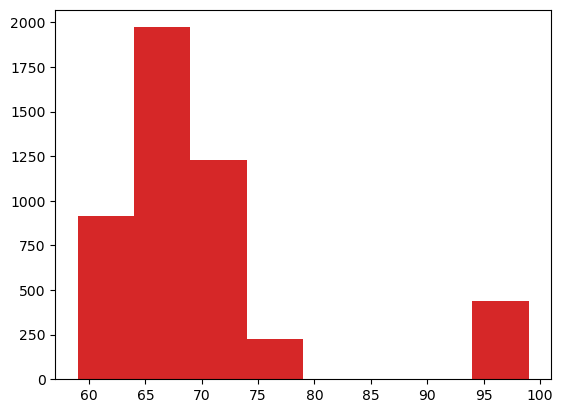

In [19]:
# Run this cell without changes
# A histogram should display below
plt.hist(height, bins=8);
plt.show()

We have plotted a histogram of the data. There are clearly outliers in the data.




5. Is the mean the best measure for central tendency given these outliers? Explain your answer.
   

Since there is outliers, I would suggest the median

6. Given knowledge of the distribution of the data and the presence of outliers, compute the relevant statistic (i.e. the mode or the median) reflecting central tendency. Use either the Counter object or numpy respectively for the statistic you have chosen.

In [30]:
sorted_num = sorted(height_list)
sorted_num[:10]

[59, 59, 59, 59, 59, 59, 59, 59, 59, 59]

In [22]:
len_height = len(height_list)
len_height

4785

In [23]:
if len_height == 2:
    mid1 = sorted_num[len_height // 2 -1]
    mid2 = sorted_num[len_height // 2]
    median = (mid1 + mid2)/2
else:
    median = sorted_num[len_height // 2]

median

67

In [24]:
np.median(height_list)

67.0

7. There are cases where the extreme values are either erroneous data points or are not relevant to the aims of our analysis. Filtering outliers is useful in this case. Filter the heights_list by removing any values greater than 80. This value is set by inspection of the histogram above. Save this to a new list called filtered_heights_list

In [35]:
filter_height_list = []

for i in height_list:
    if i < 80:
        filter_height_list.append(i) # 'i' is already the value, no need to right height_list[i]

len(filter_height_list)

4347

In [39]:
filter_height_list[:12]

[74, 70, 61, 68, 66, 70, 65, 64, 65, 66, 61, 61]

In [37]:
max(filter_height_list)

76

In [43]:
sor = sorted(filter_height_list)
sor[-5:] # yes, 76 is the max

[76, 76, 76, 76, 76]

8. Compute the mean on the filtered_heights_list:

In [44]:
np.mean(filter_height_list)

66.85231193926846

9. How does the mean of the data with outliers removed compare to the mean of the original data? How do both means compare to the median?

Lower

The mean on the filtered list is lower than the original mean. It lies close to the median on the original dataset. Quick inspection of the histogram shows that both the median of the original data and the mean of the data with outliers removed lie at the center of the main distribution of heights.

10. Calculate the mode for height data. Complete the function below so that it returns a list of values – there may be more than one value – which have the highest frequency.

In [50]:
# Throughout this cell, replace None with appropriate code

def get_mode(data):

    # Create and populate frequency distribution
    frequency_dict = {}

    for height in data:
        # If an element is not in the dict, add it to the dict with value 1
        # If an element is already in the dict, +1 the value in place
        if height in frequency_dict.keys():
            frequency_dict[height] += 1
        else:
            frequency_dict[height] = 1

    # Find the frequency of the mode(s) by finding the largest
    # value in frequency_dict
    highest_freq = max(frequency_dict.values())

    # Create a list for mode values
    modes = []

    # From the dictionary, add element(s) to the modes list with max frequency
    for height, frequency in frequency_dict.items():
        if frequency == highest_freq:
            modes.append(height)

    # Return the mode list
    return modes


11. Use the above function to calculate the mode of the original height list.

In [51]:
get_mode(height_list)

[64]

12.  Use the collections library and Counter object to extract the mode.

In [52]:
from collections import Counter

In [53]:
counts = Counter(height_list)
mode = counts.most_common(1)[0][0]
mode

64

In [54]:
counts

Counter({64: 451,
         66: 410,
         67: 384,
         65: 366,
         68: 361,
         69: 306,
         63: 306,
         96: 294,
         70: 277,
         62: 269,
         72: 262,
         71: 238,
         61: 157,
         73: 147,
         60: 133,
         74: 108,
         75: 73,
         98: 71,
         59: 52,
         76: 47,
         97: 42,
         99: 31})

13. Discuss the location of the mode relative to the mean and median. Could knowing the value of the mode independent of the mean and median be useful? Explain.